In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt

from lens_simulation import utils
from lens_simulation.structures import SimulationParameters
from lens_simulation.Medium import Medium
from lens_simulation.Lens import Lens, LensType
from lens_simulation.beam import Beam, BeamSettings, BeamShape, BeamSpread, DistanceMode, load_beam_config

from lens_simulation.Simulation import calculate_tilted_delta_profile, calculate_delta_profile

from pprint import pprint

In [15]:
output_medium = Medium(1.33)


[[-9867. -9867. -9867. ... -9867. -9867. -9867.]
 [-9867. -9867. -9867. ... -9867. -9867. -9867.]
 [-9867. -9867. -9867. ... -9867. -9867. -9867.]
 ...
 [-9867. -9867. -9867. ... -9867. -9867. -9867.]
 [-9867. -9867. -9867. ... -9867. -9867. -9867.]
 [-9867. -9867. -9867. ... -9867. -9867. -9867.]]


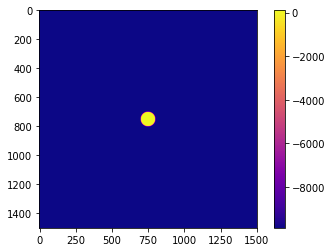

True


In [13]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np

from lens_simulation import utils
from lens_simulation.structures import SimulationParameters
from lens_simulation.Medium import Medium
from lens_simulation.Lens import Lens, LensType
from lens_simulation.beam import Beam, BeamSettings, BeamShape, BeamSpread, DistanceMode, load_beam_config

from lens_simulation.Simulation import calculate_tilted_delta_profile, calculate_delta_profile

from pprint import pprint

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The plane wave if constant along the optical axis. The beam final_width has been set to the initial width: 5.00e-04m
Only DistanceMode.Direct is supported for BeamSpread.Plane. The distance_mode has been set to DistanceMode.Direct.
The beam_shape (BeamShape.Circular) requires a symmetric beam. The beam height has been set to the beam width: 5.00e-04m 


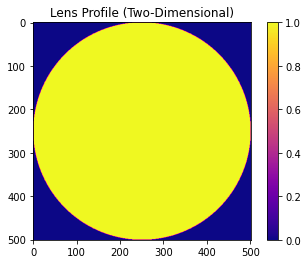

In [16]:
# create beam implementation

# sim parameters
sim_parameters = SimulationParameters(
    A = 10000, 
    pixel_size=1e-6, 
    sim_wavelength = 488e-9,
    sim_width = 500e-6,
    lens_type=LensType.Spherical
)

# load config
config = utils.load_simulation_config()

# load beam settings
beam_settings = load_beam_config(config["beam"])

# create beam
beam = Beam(settings=beam_settings)

# generate profile
beam.generate_profile(sim_parameters=sim_parameters)

# calculate propagation distances
sd, fd = beam.calculate_propagation_distance()

# plot profile
fig = utils.plot_lens_profile_2D(beam.lens)
plt.show()


# QUERY:
# does converging need a theta? does it make sense without? all same value otherwise
# apeturing_value - why non-zero
# numerical_aperture

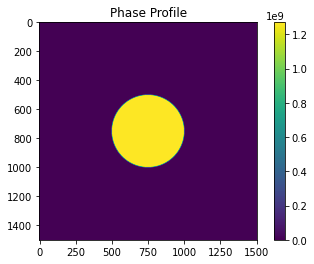

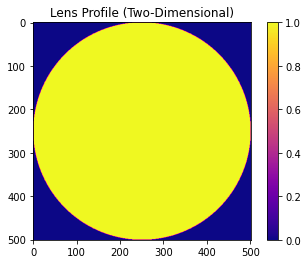

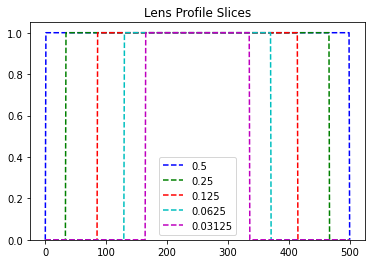

In [17]:
from lens_simulation.Simulation import Simulation, propagate_wavefront, save_result_plots
from lens_simulation.structures import SimulationStage, SimulationResult, SimulationParameters, SimulationOptions

output_medium = Medium(1.33)

stage = SimulationStage(
    lens = beam.lens, 
    output=output_medium, 
    n_slices=10, 
    start_distance=beam.start_distance,
    finish_distance=beam.finish_distance,
)

options = SimulationOptions(
    log_dir = "log/beam_test"
)

result = propagate_wavefront(stage, sim_parameters, options, passed_wavefront = None)

save_result_plots(result, stage, sim_parameters, options.log_dir)



### Tilted Delta

[[-9.867e-08 -9.867e-08 -9.867e-08 ... -9.867e-08 -9.867e-08 -9.867e-08]
 [-9.867e-08 -9.867e-08 -9.867e-08 ... -9.867e-08 -9.867e-08 -9.867e-08]
 [-9.867e-08 -9.867e-08 -9.867e-08 ... -9.867e-08 -9.867e-08 -9.867e-08]
 ...
 [-9.867e-08 -9.867e-08 -9.867e-08 ... -9.867e-08 -9.867e-08 -9.867e-08]
 [-9.867e-08 -9.867e-08 -9.867e-08 ... -9.867e-08 -9.867e-08 -9.867e-08]
 [-9.867e-08 -9.867e-08 -9.867e-08 ... -9.867e-08 -9.867e-08 -9.867e-08]]


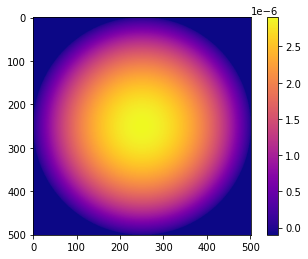

True


In [16]:
import numpy as np

delta = calculate_tilted_delta_profile(sim_profile=beam.lens.profile, 
lens=beam.lens, 
output_medium=output_medium, 
tilt_enabled=True, ytilt=0)

print(delta) 

plt.imshow(delta, cmap="plasma")
plt.colorbar()
plt.show()


delta1 = calculate_delta_profile(beam.lens.profile, beam.lens, output_medium)
# delta = calculate_tilted_delta_profile(beam.lens.profile, beam.lens, output_medium, tilt_enabled=True, ytilt=0)

print(np.array_equal(delta, delta1))

# print(delta) 

# plt.imshow(delta, cmap="plasma")
# plt.colorbar()
# plt.show()